## USA HOUSING DATASET

In [3]:
import pandas as pd
df = pd.read_csv("datasets/USA Housing Dataset.csv")
df.head(8)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
5,2014-05-10 00:00:00,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley,WA 98038,USA
6,2014-05-10 00:00:00,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,6521 Fremont Ave N,Seattle,WA 98103,USA
7,2014-05-10 00:00:00,265000.0,4.0,1.00,1940,9533,1.0,0,0,3,1080,860,1962,2003,9908 S 210th Pl,Kent,WA 98031,USA


## Introduction 

Predicting house prices using a dataset from Kaggle that includes features like the number of bedrooms, bathrooms, living space size, population, and household price. It helps potential buyers understand fair market prices for properties with specific attributes, making it easier to decide whether a property is priced appropriately. Agents can use the model to help price homes accurately, avoiding underpricing or overpricing. Overall, it solves the problem of estimating housing prices, which can assist various stakeholders in making informed financial decisions regarding real estate.

## Data Understanding and Pre-processing

In [6]:
df.columns # found 18 columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [8]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [10]:
df.index

RangeIndex(start=0, stop=4140, step=1)

In [12]:
df.shape
# 4140 rows and 18 columns (across)

(4140, 18)

In [14]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


Resource: 

It calculates and provides summary statistics like count, mean, standard deviation, minimum, maximum, and percentiles (25%, 50%, 75%) for each numeric column.
For non-numeric columns (like strings), it provides statistics like count, unique values, top value, and frequency of the top value.

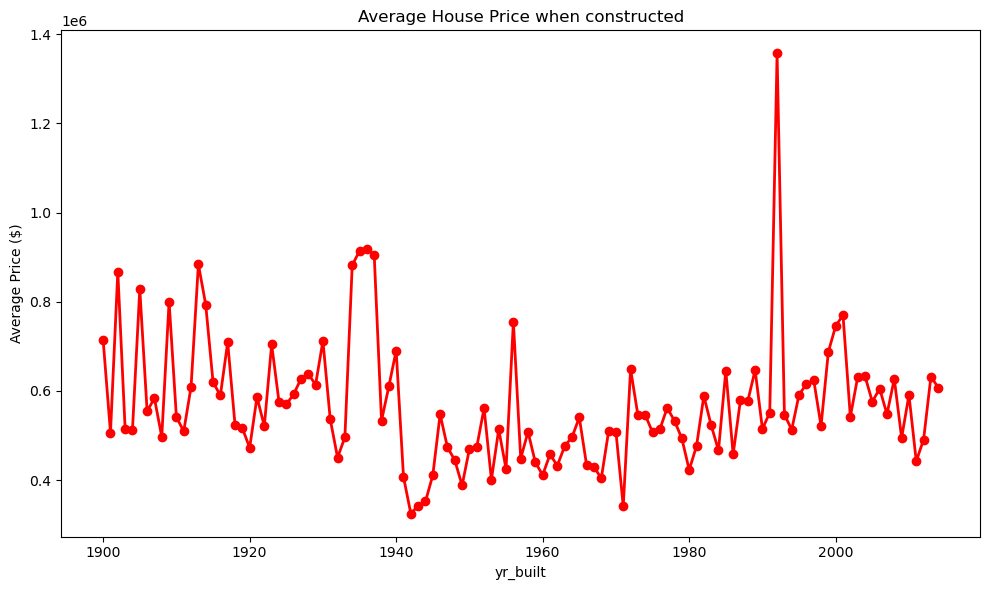

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/USA Housing Dataset.csv')

df['yr_built'] = pd.to_numeric(df['yr_built'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

average_price_per_year = df.groupby('yr_built')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year['yr_built'], average_price_per_year['price'], marker='o', color='red', linestyle='-', linewidth=2)

plt.xlabel('yr_built')
plt.ylabel('Average Price ($)')
plt.title('Average House Price when constructed')
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/USA Housing Dataset.csv')
# Dropping irrelevant columns
df_cleaned = df.drop(columns=['street', 'statezip', 'country', 'date'])
missing_values = df_cleaned.isnull().sum()
missing_values


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
dtype: int64

The 'street', 'statezip','country','data'are irravelent columns that don't require necessary exploration. 
There are no missing values in the dataset after looking for missing values. 

## Experiment # 1 Training + Testing + Evaluating performance

Next, I'll encode the city column using one-hot encoding and then split the data into features (X) and target (y) for model training. After that, we can scale the numerical features and proceed to build a linear regression model.
Data Preparation 

In [7]:
df_encoded = pd.get_dummies(df_cleaned, columns=['city'], drop_first=True)
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(54774079827.50566, 0.47752327662060257)

Mean Squared Error (MSE): 54,828,701,952.41
R-squared (R^(2)): 0.477
47%

## Experiment 1: Evualting Performance

The R² score indicates that the model explains approximately 47.7% of the variance in housing prices, which leaves room for improvement. The MSE suggests that the average squared difference between predicted and actual prices is quite large, which might imply that additional features or different models could improve performance.


## Experiment 2: Evualting 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
housing_data = pd.read_csv("datasets/USA Housing Dataset.csv")
# DROPPING UNNECESSARY VARIABLES
X = housing_data.drop(columns=['price', 'street', 'statezip', 'country', 'date'])
y = housing_data['price']

# One-hot encode the city
X = pd.get_dummies(X, columns=['city'], drop_first=True)

# Split them into two
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf
print("Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R²): {r2_rf}")


Random Forest Model Evaluation:
Mean Squared Error (MSE): 57042027934.65769
R-squared (R²): 0.45588986717673896


Experiment 2
## 45.6%
After making predictions, it evaluates the model using Mean Squared Error and R-squared metrics to gauge its performance. This provides insights into how well the Random Forest model fits the housing price data. Unfortuantely the 45.6% is still not tuning the data to our specifications. Further improvement is required to find exactly what we need to get R-Squared to increase. Another model would be used instead to fit the housing price data. 

## Experiment 3

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


housing_data = pd.read_csv("datasets/USA Housing Dataset.csv")
#Dropping the variables 
X = housing_data.drop(columns=['price', 'street', 'statezip', 'country', 'date'])
y = housing_data['price']

# One-hot encode the city
X = pd.get_dummies(X, columns=['city'], drop_first=True)

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, r2_gb


(108151522201.64642, -0.03163125928104904)

The evaluation results for the Gradient Boosting model are as follows:

Mean Squared Error (MSE): 108,151,522,201.65
R-squared (R²): -0.032 (indicating the model performed worse than a simple mean-based prediction)

After conducting Gradient Boosting model it has been concluded that the model is the worst of all three models. Clearly it does not fit well with the house dataset I would need to retrace my approach and fine tune some features that better to predict. 